# Assignment Title: Unsupervised Learning with Dimensionality Reduction and Clustering

**Authors:** Koustab Ghosh<sup>1</sup> & Sujoy Kumar Biswas<sup>2</sup>

**Affiliation**:
1. Researcher, IDEAS-TIH, Indian Statistical Institute, Kolkata
2. Head of Research & Innovation, IDEAS-TIH, Indian Statistical Institute, Kolkata

**Dated**: Sep 07th, 2025


We shall work with the MNIST handwritten digits' image dataset. The details about the dataset is available [here](https://en.wikipedia.org/wiki/MNIST_database).

We need the scikit-learn library to import the various machine leanring models for our study.

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

## Question 1. Complete the following lines of code for K-Means clustering

In [44]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# kmeans = ...
# clusters = ...
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

(10, 64)


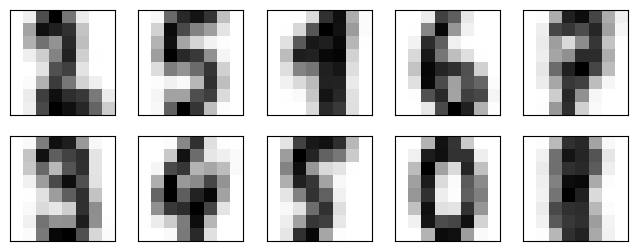

In [45]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits.

Next, we shall apply dimensioanlity reduction of MNIST handwritten datasets with PCA

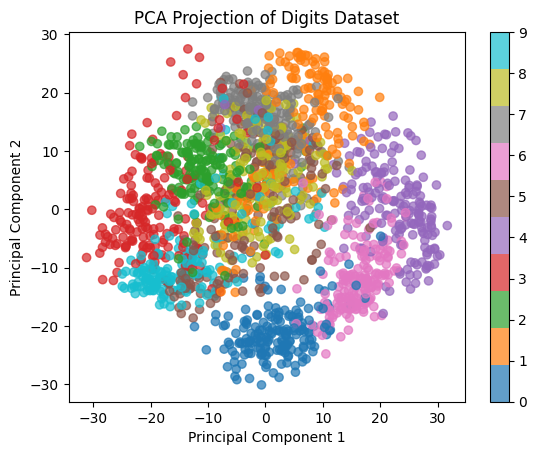

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(digits.data)

# Visualize the PCA results
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=digits.target, cmap='tab10', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Digits Dataset")
plt.colorbar()
plt.show()

## Question 2. Complete the following lines of code for

Step 1. Dimensionality reduction with PCA. The 8x8=64 dimensional data need to be reduced to 2-dimensional.

Step 2. K-means clustering should be done on the reduced diemnsional data. Initial K value should be set to 10 like before.

Step 3. Visualization code is supplied below.

In [47]:
# data loading
data = digits.data

# PCA dimensionality reduction
model = PCA(n_components=2)
reduced_data = model.fit_transform(data)

# K-Means clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(reduced_data)

**Data Visualization**

We shall visualize the reduced diemnsion and cluster data (overlapped) with the help of the following code snippet.

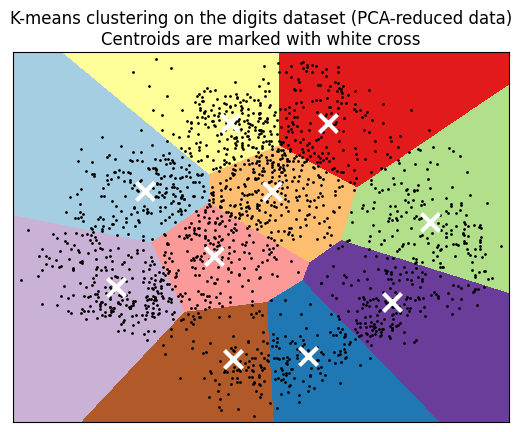

In [48]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
clusters = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
clusters = clusters.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    clusters,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Question 3.

Find a high dimensional dataset of you choice. Show how you load the dataset. Do the basic exploratory data analysis to become familiar with the dataset.


In [49]:
# Step 1: Load dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
cancer = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target  # Add target column

# Display shape and first few rows
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Missing values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Summary statistics:
        mean radius  mean texture  mean perimeter

/tmp/ipython-input-2671202739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


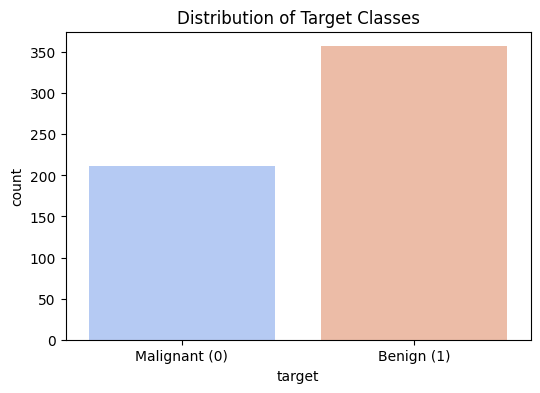

In [50]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Target distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.xticks([0,1], ['Malignant (0)', 'Benign (1)'])
plt.title('Distribution of Target Classes')
plt.show()


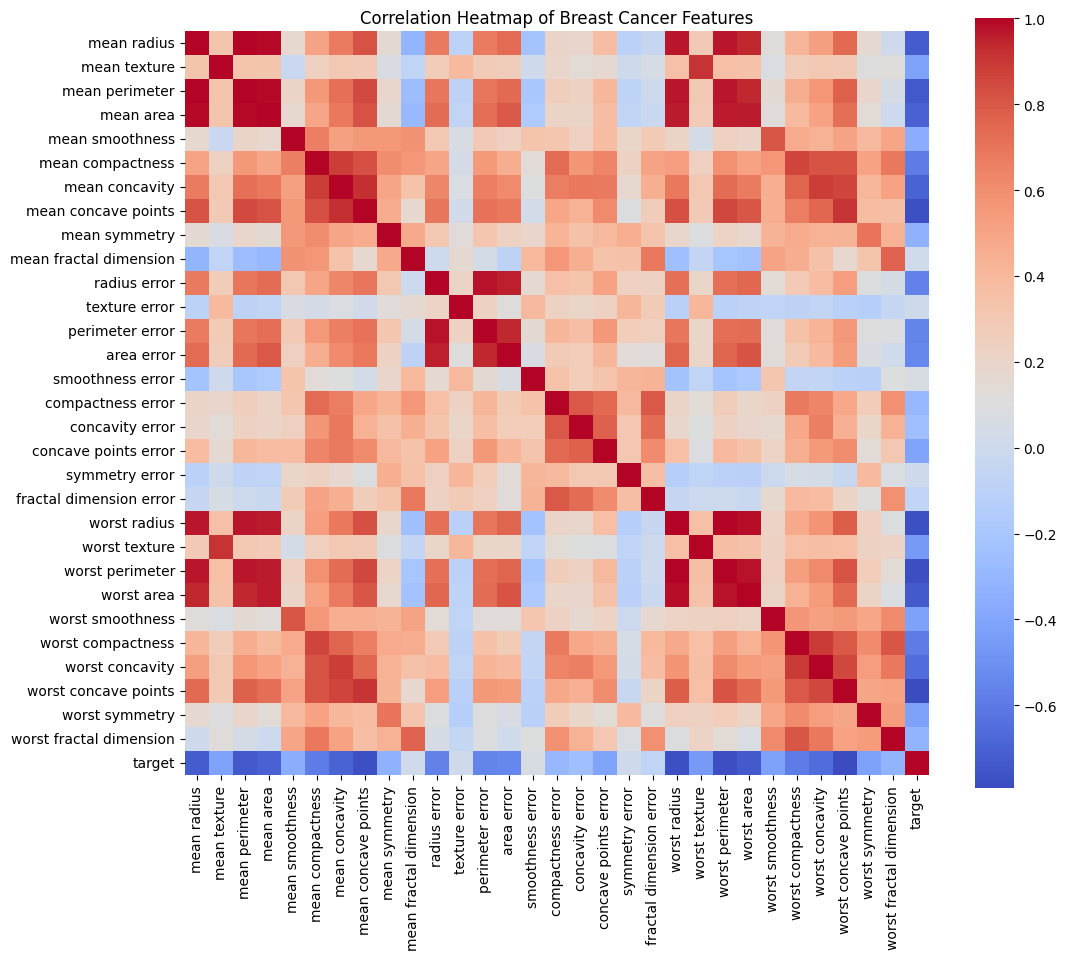

In [51]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Object-Oriented Class
class YourDataClustering:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
        self.data = None
        self.labels = None
        self.kmeans = None
        self.scaled_data = None
        self.reduced_data = None

    def load_data(self):
        """Load the Iris dataset"""
        iris = load_iris()
        self.data = iris.data
        return self.data

    def preprocess_data(self):
        """Standardize the dataset and reduce to 2D with PCA"""
        scaler = StandardScaler()
        self.scaled_data = scaler.fit_transform(self.data)

        pca = PCA(n_components=2)
        self.reduced_data = pca.fit_transform(self.scaled_data)
        return self.reduced_data

    def apply_kmeans(self):
        """Apply KMeans clustering"""
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        self.labels = self.kmeans.fit_predict(self.reduced_data)
        return self.labels

    def evaluate_clusters(self):
        """Compute silhouette score"""
        score = silhouette_score(self.reduced_data, self.labels)
        print(f"Silhouette Score: {score:.3f}")
        return score

    def visualize_clusters_matplotlib(self):
        """Visualize clustering result using Matplotlib"""
        plt.scatter(self.reduced_data[:, 0], self.reduced_data[:, 1],
                    c=self.labels, cmap='viridis')
        plt.title("KMeans Clustering on Iris Dataset (Matplotlib)")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.show()

    def visualize_clusters_opencv(self):
        """Visualize clustering result using OpenCV (Colab Compatible)"""
        canvas_size = 600
        canvas = np.ones((canvas_size, canvas_size, 3), dtype=np.uint8) * 255
        colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

        # Normalize PCA data to fit within canvas
        min_vals = self.reduced_data.min(axis=0)
        max_vals = self.reduced_data.max(axis=0)
        normalized = (self.reduced_data - min_vals) / (max_vals - min_vals)
        scaled = (normalized * (canvas_size - 50) + 25).astype(int)

        # Draw each point
        for i, point in enumerate(scaled):
            cv2.circle(canvas, tuple(point), 5, colors[self.labels[i] % 3], -1)

        # Show image inline in Colab
        cv2_imshow(canvas)



Silhouette Score: 0.523


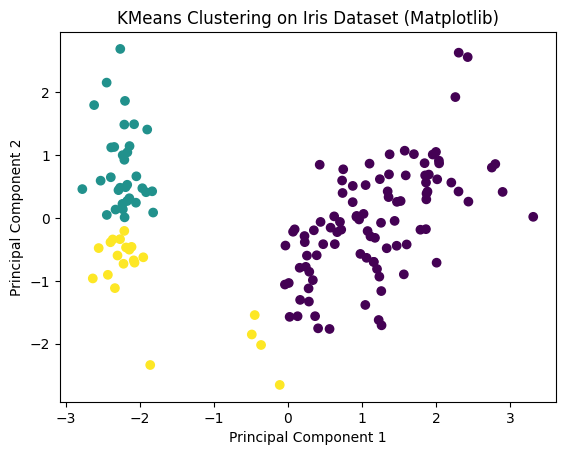

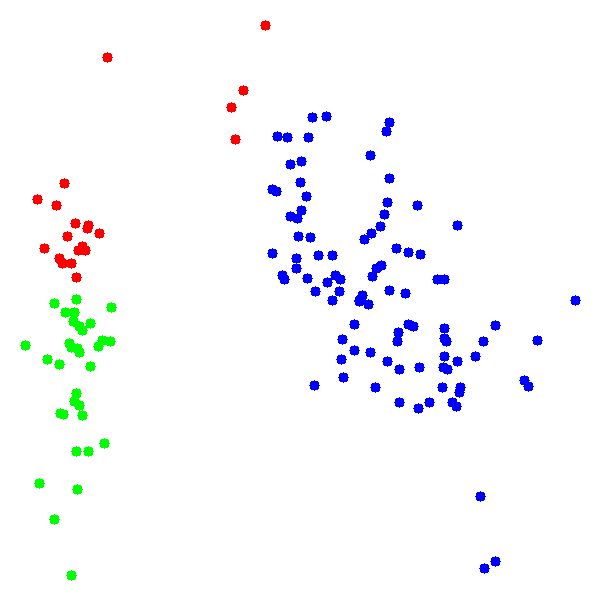

In [53]:

# Step 1: Create clustering object
clustering = YourDataClustering(n_clusters=3)

# Step 2: Load dataset
clustering.load_data()

# Step 3: Preprocess dataset
clustering.preprocess_data()

# Step 4: Apply KMeans clustering
clustering.apply_kmeans()

# Step 5: Evaluate clusters
clustering.evaluate_clusters()

# Step 6: Visualize with Matplotlib
clustering.visualize_clusters_matplotlib()

# Step 7: Visualize with OpenCV
clustering.visualize_clusters_opencv()